#In this problem, first, we want to implement a baseline neural network classification model, and then improve it.
write your code in the provided area.

# Importing required packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the Fashion MNIST dataset from torchvision package

In [8]:
#Your code
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_data = datasets.FashionMNIST(root= './data', download = True, train = True, transform = transform)
test_data = datasets.FashionMNIST(root= './data', download = True, train = False, transform = transform)

#Your code

100%|██████████| 26.4M/26.4M [00:17<00:00, 1.51MB/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 52.1MB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:03<00:00, 1.36MB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.22MB/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



# Split dataset into train, validation, and test sets(80 percent for training dataset)

In [30]:
#Your code
train_size = int(0.8*len(train_data))
validation_size = len(train_data) - train_size
train_data, validation_data = random_split(train_data, [train_size, validation_size])

#Your code

# Create Data loaders for training, validation, and test sets.

In [50]:
#Your code

train_loader = DataLoader(train_data, shuffle = True, batch_size = 64, num_workers=4, pin_memory=True)
validation_loader = DataLoader(validation_data, shuffle = False, batch_size = 64, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_data, shuffle = False, batch_size = 64, num_workers=4, pin_memory=True)

#Your code

# Visualize some samples from each each class

In [12]:
#Your code

def visualize(dataset, samples_per_class, classes):
  plt.figure(figsize=(10, 10))
  num_classes = 10
  cnt = 0

  for i in range(num_classes):
    
    indices = [j for j, (_, label) in enumerate(dataset) if label == i]
    
    selected_indices = torch.randperm(len(indices))[:samples_per_class]
    
    for j, idx in enumerate(selected_indices):
        
        plt.subplot(num_classes, samples_per_class, cnt + 1)
        plt.imshow(dataset[indices[idx]][0].squeeze(), cmap='gray')
        plt.axis('off')
        
        if j == 0:
            plt.title(classes[i])
        cnt += 1

  plt.tight_layout()
  plt.show()

#Your code

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

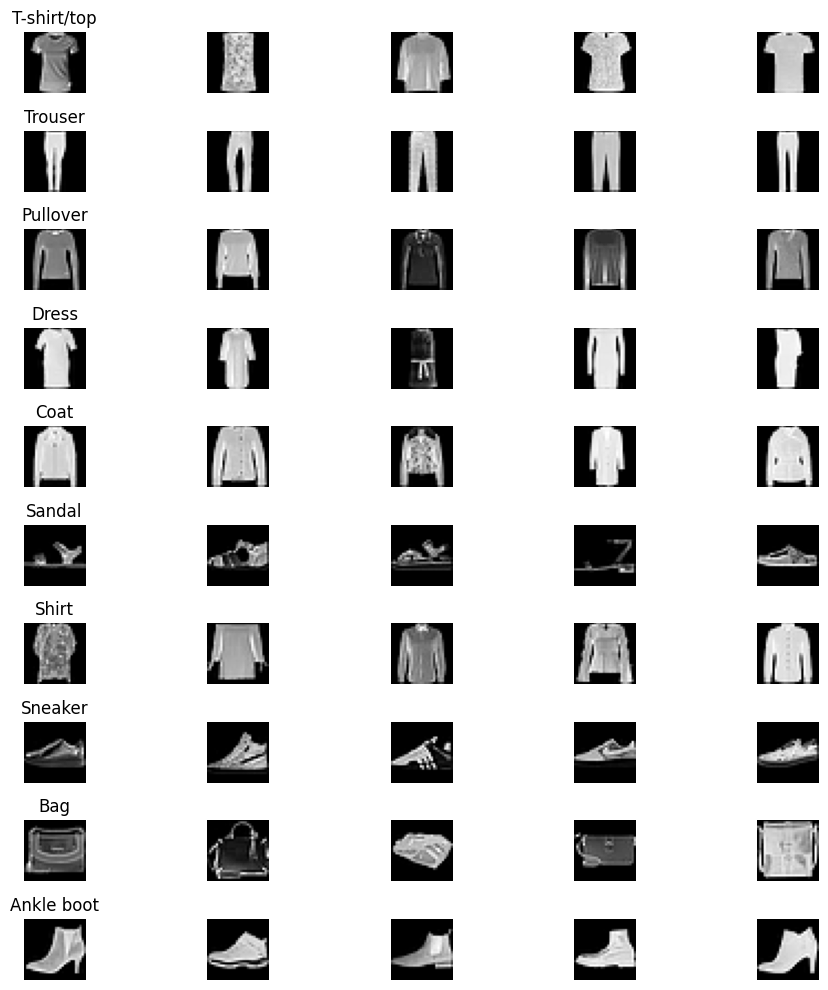

In [14]:
visualize(train_data, 5, class_names)

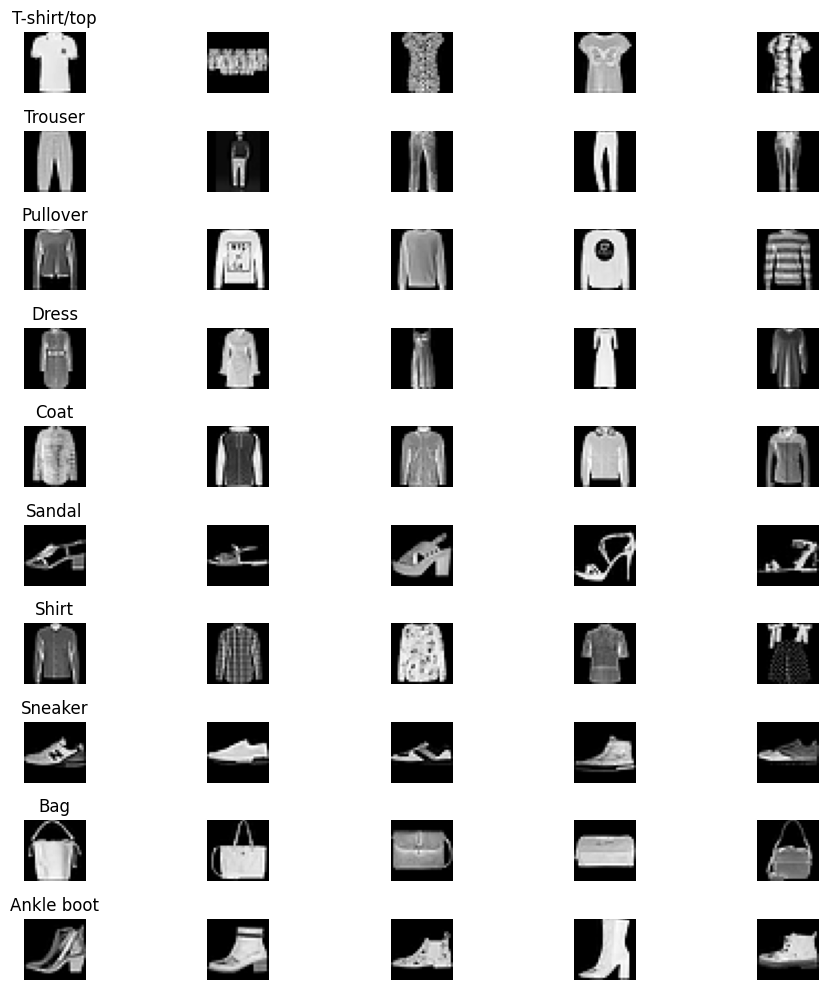

In [15]:
visualize(test_data, 5, class_names)

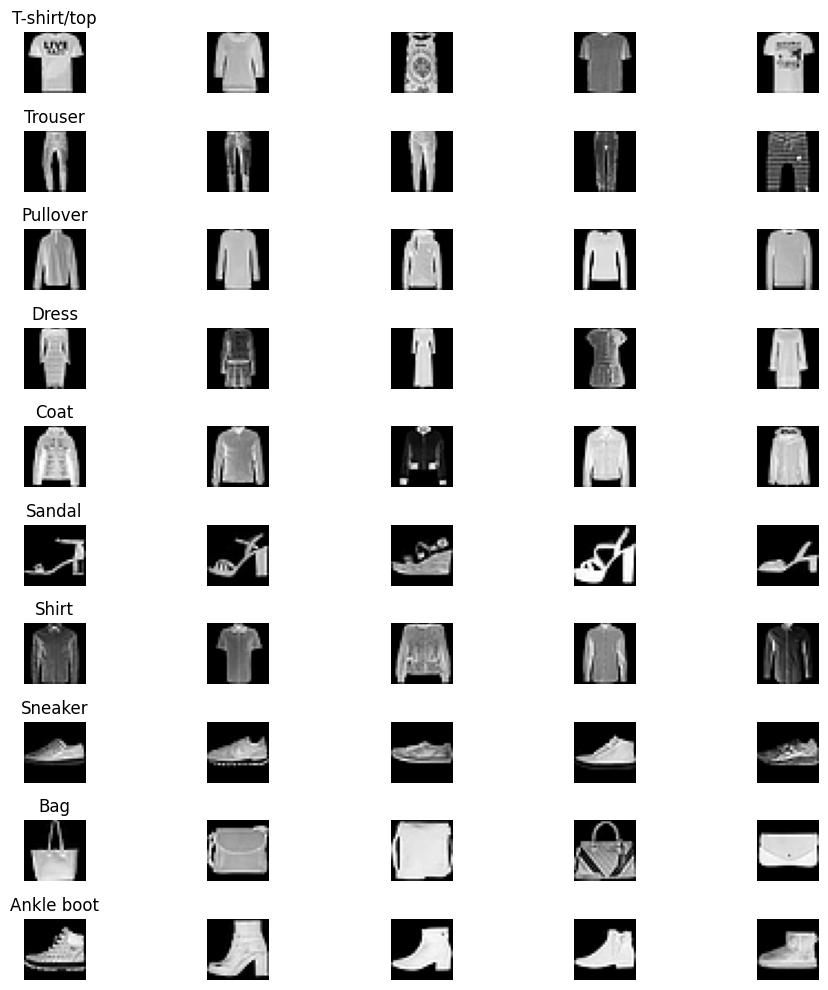

In [16]:
visualize(validation_data, 5, class_names)

# Define a simple neural network (MLP) without convolution layers

In [26]:
#Your code
class ReLU_model(nn.Module):

    def __init__(self):
        super(ReLU_model, self).__init__()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [27]:
#Your code
class Tanh_model(nn.Module):

    def __init__(self):
        super(Tanh_model, self).__init__()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(512, 256)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(256, 128)
        self.tanh3 = nn.Tanh()
        self.fc4 = nn.Linear(128, 64)
        self.tanh4 = nn.Tanh()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh1(x)
        x = self.fc2(x)
        x = self.tanh2(x)
        x = self.fc3(x)
        x = self.tanh3(x)
        x = self.fc4(x)
        x = self.tanh4(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

# Define your loss function, and optimizer

In [28]:
#Your code

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relu_model = ReLU_model().to(device)
tanh_model = Tanh_model().to(device)
criterion = nn.CrossEntropyLoss()
relu_optimizer = optim.Adam(relu_model.parameters(), lr = 0.001)
tanh_optimizer = optim.Adam(tanh_model.parameters(), lr = 0.001)


#Your code

#Train two models: one using the ReLU activation function and the other using the Tanh activation function, while keeping all other parameters the same. Finally, report the accuracies on the test dataset.

#In one figure, plot the loss over epochs for both the training and validation sets. In a separate figure, plot the accuracy over epochs for the training and validation sets for both models.(At the end, you should have 4 figures)

#How do the models differ in terms of performance?

In [37]:
#Your code
from tqdm import tqdm
num_epochs = 30

relu_train_losses = []
tanh_train_losses = []

relu_train_accs = []
tanh_train_accs = []


relu_val_losses = []
tanh_val_losses = []

relu_val_accs = []
tanh_val_accs = []


for epoch in range(num_epochs):

    relu_train_loss = 0
    relu_train_acc = 0

    tanh_train_loss = 0
    tanh_train_acc = 0
    
    for images, labels in tqdm(train_loader, desc = f"Epoch {epoch + 1}/{num_epochs}"):

        images, labels = images.to(device), labels.to(device)
        
        relu_optimizer.zero_grad()
        tanh_optimizer.zero_grad()
        
        relu_outputs = relu_model.forward(images)
        tanh_outputs = tanh_model.forward(images)

        relu_loss = criterion(relu_outputs, labels)
        tanh_loss = criterion(tanh_outputs, labels)
        
        relu_loss.backward()
        tanh_loss.backward()
        
        relu_optimizer.step()
        tanh_optimizer.step()

        relu_train_loss += relu_loss
        tanh_train_loss += tanh_loss

        relu_train_acc += (torch.argmax(relu_outputs, dim = 1) == labels).sum()
        tanh_train_acc += (torch.argmax(tanh_outputs, dim = 1) == labels).sum()

    relu_train_losses.append(relu_train_loss.item() / len(train_data))
    tanh_train_losses.append(tanh_train_loss.item() / len(train_data))

    relu_train_accs.append(relu_train_acc.item() / len(train_data) * 100)
    tanh_train_accs.append(tanh_train_acc.item() / len(train_data) * 100)        

    print("epoch =", epoch + 1)
    print("relu_train_loss =", relu_train_losses[-1], "relu_train_acc =", relu_train_accs[-1])
    print("tanh_train_loss =", tanh_train_losses[-1], "tanh_train_acc =", tanh_train_accs[-1])

    with torch.no_grad():

        relu_val_loss = 0
        tanh_val_loss = 0
        
        relu_val_acc = 0
        tanh_val_acc = 0

    
        for images, labels in validation_loader:
    
            images, labels = images.to(device), labels.to(device)
            
            relu_outputs = relu_model.forward(images)
            tanh_outputs = tanh_model.forward(images)
            
            relu_loss = criterion(relu_outputs, labels)
            tanh_loss = criterion(tanh_outputs, labels)
    
            
            relu_val_loss += relu_loss
            tanh_val_loss += tanh_loss
            
            relu_val_acc += (torch.argmax(relu_outputs, dim = 1) == labels).sum()
            tanh_val_acc += (torch.argmax(tanh_outputs, dim = 1) == labels).sum()
            
        print("relu_val_loss =", relu_val_loss.item() / len(validation_data), "relu_val_acc =", relu_val_acc.item() / len(validation_data) * 100)
        print("tanh_val_loss =", tanh_val_loss.item() / len(validation_data), "tanh_val_acc =", tanh_val_acc.item() / len(validation_data) * 100)

        relu_val_losses.append(relu_val_loss.item() / len(validation_data))
        tanh_val_losses.append(tanh_val_loss.item() / len(validation_data))

        relu_val_accs.append(relu_val_acc.item() / len(validation_data) * 100)
        tanh_val_accs.append(tanh_val_acc.item() / len(validation_data) * 100)
    
#Your code

Epoch 1/30: 100%|██████████| 600/600 [00:13<00:00, 45.16it/s]


epoch = 1
relu_train_loss = 0.02574684460957845 relu_train_acc = 81.28385416666667
tanh_train_loss = 0.025544934272766114 tanh_train_acc = 82.58072916666667
relu_val_loss = 0.025665098826090495 relu_val_acc = 81.82291666666667
tanh_val_loss = 0.025633583068847655 tanh_val_acc = 82.08333333333333


Epoch 2/30: 100%|██████████| 600/600 [00:12<00:00, 48.74it/s]


epoch = 2
relu_train_loss = 0.02567440350850423 relu_train_acc = 81.78125
tanh_train_loss = 0.02552446206410726 tanh_train_acc = 82.73177083333333
relu_val_loss = 0.025741833051045736 relu_val_acc = 81.32291666666667
tanh_val_loss = 0.025652599334716798 tanh_val_acc = 81.82291666666667


Epoch 3/30: 100%|██████████| 600/600 [00:12<00:00, 48.55it/s]


epoch = 3
relu_train_loss = 0.025640058517456054 relu_train_acc = 81.99739583333333
tanh_train_loss = 0.025468432108561197 tanh_train_acc = 83.08854166666667
relu_val_loss = 0.025785676638285317 relu_val_acc = 81.0625
tanh_val_loss = 0.02550613562266032 tanh_val_acc = 82.8125


Epoch 4/30: 100%|██████████| 600/600 [00:13<00:00, 45.36it/s]


epoch = 4
relu_train_loss = 0.02575891971588135 relu_train_acc = 81.2109375
tanh_train_loss = 0.025462746620178223 tanh_train_acc = 83.11979166666667
relu_val_loss = 0.025719501177469888 relu_val_acc = 81.47916666666667
tanh_val_loss = 0.025861819585164387 tanh_val_acc = 80.48958333333334


Epoch 5/30: 100%|██████████| 600/600 [00:12<00:00, 49.83it/s]


epoch = 5
relu_train_loss = 0.025770052274068197 relu_train_acc = 81.171875
tanh_train_loss = 0.025462953249613444 tanh_train_acc = 83.11458333333334
relu_val_loss = 0.02584150473276774 relu_val_acc = 80.67708333333333
tanh_val_loss = 0.02538264274597168 tanh_val_acc = 83.65625


Epoch 6/30: 100%|██████████| 600/600 [00:12<00:00, 49.87it/s]


epoch = 6
relu_train_loss = 0.02584397792816162 relu_train_acc = 80.69010416666667
tanh_train_loss = 0.0253662904103597 tanh_train_acc = 83.73697916666667
relu_val_loss = 0.026321021715799968 relu_val_acc = 77.625
tanh_val_loss = 0.025570693016052245 tanh_val_acc = 82.41666666666667


Epoch 7/30: 100%|██████████| 600/600 [00:11<00:00, 50.35it/s]


epoch = 7
relu_train_loss = 0.025726795196533203 relu_train_acc = 81.45052083333333
tanh_train_loss = 0.025393295288085937 tanh_train_acc = 83.56770833333333
relu_val_loss = 0.025811963081359864 relu_val_acc = 80.89583333333333
tanh_val_loss = 0.025489206314086913 tanh_val_acc = 82.94791666666667


Epoch 8/30: 100%|██████████| 600/600 [00:11<00:00, 50.22it/s]


epoch = 8
relu_train_loss = 0.025902193387349448 relu_train_acc = 80.31770833333334
tanh_train_loss = 0.025381641387939455 tanh_train_acc = 83.6484375
relu_val_loss = 0.02628081480662028 relu_val_acc = 77.85416666666667
tanh_val_loss = 0.025488171577453613 tanh_val_acc = 82.96875


Epoch 9/30: 100%|██████████| 600/600 [00:11<00:00, 50.65it/s]


epoch = 9
relu_train_loss = 0.02598072052001953 relu_train_acc = 79.81770833333334
tanh_train_loss = 0.025342499415079753 tanh_train_acc = 83.84635416666667
relu_val_loss = 0.0260398801167806 relu_val_acc = 79.44791666666666
tanh_val_loss = 0.025340476036071778 tanh_val_acc = 83.91666666666666


Epoch 10/30: 100%|██████████| 600/600 [00:11<00:00, 51.47it/s]


epoch = 10
relu_train_loss = 0.026271357536315917 relu_train_acc = 77.96354166666667
tanh_train_loss = 0.02530324141184489 tanh_train_acc = 84.11979166666667
relu_val_loss = 0.025591500600179038 relu_val_acc = 82.27083333333334
tanh_val_loss = 0.025281283060709637 tanh_val_acc = 84.26041666666667


Epoch 11/30: 100%|██████████| 600/600 [00:11<00:00, 50.84it/s]


epoch = 11
relu_train_loss = 0.025817979176839194 relu_train_acc = 80.86458333333333
tanh_train_loss = 0.02527891476949056 tanh_train_acc = 84.31770833333333
relu_val_loss = 0.02580819288889567 relu_val_acc = 80.90625
tanh_val_loss = 0.025274098714192707 tanh_val_acc = 84.20833333333333


Epoch 12/30: 100%|██████████| 600/600 [00:11<00:00, 51.54it/s]


epoch = 12
relu_train_loss = 0.02599711577097575 relu_train_acc = 79.71614583333333
tanh_train_loss = 0.02527589480082194 tanh_train_acc = 84.2890625
relu_val_loss = 0.02569955348968506 relu_val_acc = 81.60416666666667
tanh_val_loss = 0.025460480054219563 tanh_val_acc = 83.04166666666667


Epoch 13/30: 100%|██████████| 600/600 [00:12<00:00, 49.63it/s]


epoch = 13
relu_train_loss = 0.02588160514831543 relu_train_acc = 80.45052083333334
tanh_train_loss = 0.02523633639017741 tanh_train_acc = 84.59895833333333
relu_val_loss = 0.025935633977254232 relu_val_acc = 80.08333333333333
tanh_val_loss = 0.025282912254333496 tanh_val_acc = 84.27083333333333


Epoch 14/30: 100%|██████████| 600/600 [00:12<00:00, 46.38it/s]


epoch = 14
relu_train_loss = 0.026074587504069012 relu_train_acc = 79.2265625
tanh_train_loss = 0.02520623048146566 tanh_train_acc = 84.765625
relu_val_loss = 0.02571688493092855 relu_val_acc = 81.52083333333333
tanh_val_loss = 0.02539807637532552 tanh_val_acc = 83.55208333333334


Epoch 15/30: 100%|██████████| 600/600 [00:13<00:00, 44.49it/s]


epoch = 15
relu_train_loss = 0.02602747917175293 relu_train_acc = 79.52604166666667
tanh_train_loss = 0.025254368782043457 tanh_train_acc = 84.46614583333333
relu_val_loss = 0.025836251576741538 relu_val_acc = 80.76041666666667
tanh_val_loss = 0.02537230650583903 tanh_val_acc = 83.6875


Epoch 16/30: 100%|██████████| 600/600 [00:12<00:00, 49.39it/s]


epoch = 16
relu_train_loss = 0.02595488707224528 relu_train_acc = 79.9921875
tanh_train_loss = 0.02523887316385905 tanh_train_acc = 84.5546875
relu_val_loss = 0.025826765696207683 relu_val_acc = 80.80208333333333
tanh_val_loss = 0.025291317303975422 tanh_val_acc = 84.22916666666667


Epoch 17/30: 100%|██████████| 600/600 [00:13<00:00, 44.90it/s]


epoch = 17
relu_train_loss = 0.026050500869750977 relu_train_acc = 79.39322916666667
tanh_train_loss = 0.02521950085957845 tanh_train_acc = 84.70572916666667
relu_val_loss = 0.025923638343811034 relu_val_acc = 80.1875
tanh_val_loss = 0.02549542744954427 tanh_val_acc = 82.84375


Epoch 18/30: 100%|██████████| 600/600 [00:13<00:00, 46.10it/s]


epoch = 18
relu_train_loss = 0.025788763364156086 relu_train_acc = 81.05729166666666
tanh_train_loss = 0.02519705136617025 tanh_train_acc = 84.81510416666667
relu_val_loss = 0.02572147051493327 relu_val_acc = 81.47916666666667
tanh_val_loss = 0.02529679616292318 tanh_val_acc = 84.19791666666666


Epoch 19/30: 100%|██████████| 600/600 [00:13<00:00, 45.87it/s]


epoch = 19
relu_train_loss = 0.026279191970825195 relu_train_acc = 77.91145833333334
tanh_train_loss = 0.025247365633646646 tanh_train_acc = 84.4921875
relu_val_loss = 0.026094884872436525 relu_val_acc = 79.09375
tanh_val_loss = 0.025260558128356935 tanh_val_acc = 84.39583333333334


Epoch 20/30: 100%|██████████| 600/600 [00:13<00:00, 43.57it/s]


epoch = 20
relu_train_loss = 0.026111642519632976 relu_train_acc = 78.99479166666666
tanh_train_loss = 0.02525724411010742 tanh_train_acc = 84.47135416666667
relu_val_loss = 0.02641108512878418 relu_val_acc = 77.08333333333334
tanh_val_loss = 0.025850831667582196 tanh_val_acc = 80.61458333333333


Epoch 21/30: 100%|██████████| 600/600 [00:13<00:00, 44.69it/s]


epoch = 21
relu_train_loss = 0.026259431838989256 relu_train_acc = 78.0390625
tanh_train_loss = 0.025223779678344726 tanh_train_acc = 84.6875
relu_val_loss = 0.026795454025268554 relu_val_acc = 74.625
tanh_val_loss = 0.025846694310506183 tanh_val_acc = 80.67708333333333


Epoch 22/30: 100%|██████████| 600/600 [00:12<00:00, 49.79it/s]


epoch = 22
relu_train_loss = 0.026374311447143556 relu_train_acc = 77.3125
tanh_train_loss = 0.025240635871887206 tanh_train_acc = 84.56770833333334
relu_val_loss = 0.0259430726369222 relu_val_acc = 80.08333333333333
tanh_val_loss = 0.025281124114990235 tanh_val_acc = 84.22916666666667


Epoch 23/30: 100%|██████████| 600/600 [00:12<00:00, 48.56it/s]


epoch = 23
relu_train_loss = 0.026175039609273275 relu_train_acc = 78.58854166666667
tanh_train_loss = 0.025210350354512533 tanh_train_acc = 84.75520833333333
relu_val_loss = 0.026203705469767254 relu_val_acc = 78.39583333333333
tanh_val_loss = 0.025204909642537434 tanh_val_acc = 84.78125


Epoch 24/30: 100%|██████████| 600/600 [00:12<00:00, 48.21it/s]


epoch = 24
relu_train_loss = 0.026363865534464518 relu_train_acc = 77.375
tanh_train_loss = 0.0251718537012736 tanh_train_acc = 84.9921875
relu_val_loss = 0.0260928217569987 relu_val_acc = 79.11458333333333
tanh_val_loss = 0.02529687245686849 tanh_val_acc = 84.1875


Epoch 25/30: 100%|██████████| 600/600 [00:12<00:00, 47.80it/s]


epoch = 25
relu_train_loss = 0.026233150164286297 relu_train_acc = 78.2109375
tanh_train_loss = 0.025164519945780436 tanh_train_acc = 84.97395833333333
relu_val_loss = 0.026593157450358073 relu_val_acc = 75.91666666666667
tanh_val_loss = 0.02544709046681722 tanh_val_acc = 83.21875


Epoch 26/30: 100%|██████████| 600/600 [00:12<00:00, 48.48it/s]


epoch = 26
relu_train_loss = 0.026281552314758302 relu_train_acc = 77.90364583333333
tanh_train_loss = 0.025161603291829426 tanh_train_acc = 85.05989583333333
relu_val_loss = 0.02700725555419922 relu_val_acc = 73.27083333333333
tanh_val_loss = 0.02528781572977702 tanh_val_acc = 84.22916666666667


Epoch 27/30: 100%|██████████| 600/600 [00:12<00:00, 47.55it/s]


epoch = 27
relu_train_loss = 0.026141359011332195 relu_train_acc = 78.80989583333333
tanh_train_loss = 0.025220853487650553 tanh_train_acc = 84.64322916666667
relu_val_loss = 0.02627406120300293 relu_val_acc = 77.94791666666666
tanh_val_loss = 0.025298577944437663 tanh_val_acc = 84.13541666666666


Epoch 28/30: 100%|██████████| 600/600 [00:12<00:00, 46.78it/s]


epoch = 28
relu_train_loss = 0.02617233435312907 relu_train_acc = 78.61197916666667
tanh_train_loss = 0.02516671021779378 tanh_train_acc = 85.02083333333333
relu_val_loss = 0.025997624397277833 relu_val_acc = 79.72916666666666
tanh_val_loss = 0.02541448434193929 tanh_val_acc = 83.40625


Epoch 29/30: 100%|██████████| 600/600 [00:12<00:00, 47.58it/s]


epoch = 29
relu_train_loss = 0.026321552594502768 relu_train_acc = 77.6484375
tanh_train_loss = 0.02513851801554362 tanh_train_acc = 85.22395833333334
relu_val_loss = 0.026606896718343098 relu_val_acc = 75.82291666666666
tanh_val_loss = 0.02532502810160319 tanh_val_acc = 83.91666666666666


Epoch 30/30: 100%|██████████| 600/600 [00:12<00:00, 46.51it/s]


epoch = 30
relu_train_loss = 0.025966823895772297 relu_train_acc = 79.92447916666666
tanh_train_loss = 0.02519969622294108 tanh_train_acc = 84.76822916666666
relu_val_loss = 0.026525464057922363 relu_val_acc = 76.34375
tanh_val_loss = 0.025316239992777507 tanh_val_acc = 84.09375


In [38]:
relu_test_loss = 0
tanh_test_loss = 0

relu_test_acc = 0
tanh_test_acc = 0

with torch.no_grad():
    
    for images, labels in test_loader:
        
        images, labels = images.to(device), labels.to(device)
        
        relu_outputs = relu_model.forward(images)
        tanh_outputs = tanh_model.forward(images)
        
        relu_loss = criterion(relu_outputs, labels)
        tanh_loss = criterion(tanh_outputs, labels)
        
        relu_test_loss += relu_loss
        tanh_test_loss += tanh_loss
        
        relu_test_acc += (torch.argmax(relu_outputs, dim = 1) == labels).sum()
        tanh_test_acc += (torch.argmax(tanh_outputs, dim = 1) == labels).sum()
        
    print("relu_test_loss =", relu_test_loss.item() / len(test_data), "test_acc =", relu_test_acc.item() / len(test_data) * 100)
    print("tanh_test_loss =", tanh_test_loss.item() / len(test_data), "test_acc =", tanh_test_acc.item() / len(test_data) * 100)


relu_test_loss = 0.026604296875 test_acc = 76.68
tanh_test_loss = 0.025535983276367188 test_acc = 83.39


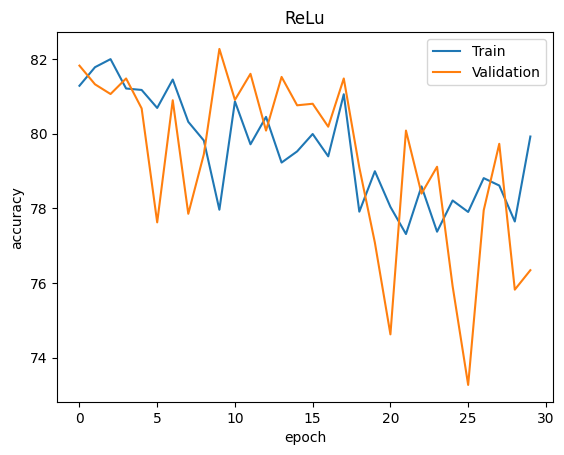

In [39]:
plt.plot(range(num_epochs), relu_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("ReLu")

plt.plot(range(num_epochs), relu_val_accs)

plt.legend(["Train", "Validation"])

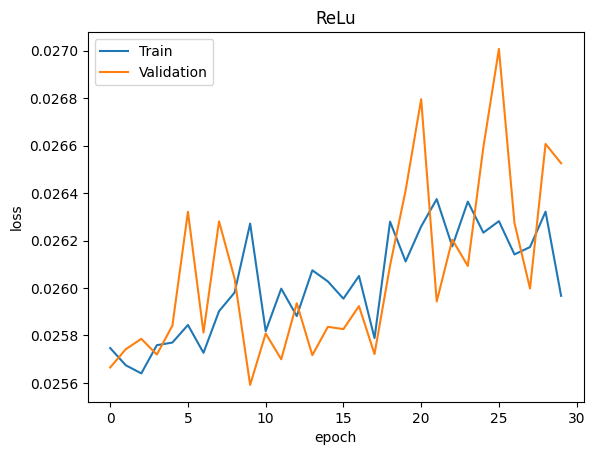

In [40]:
plt.plot(range(num_epochs), relu_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("ReLu")

plt.plot(range(num_epochs), relu_val_losses)

plt.legend(["Train", "Validation"])

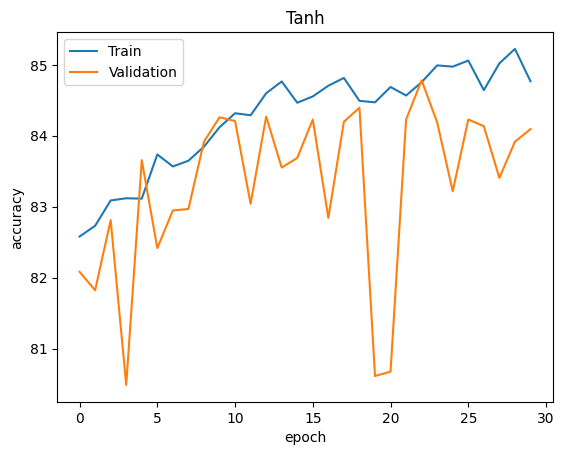

In [41]:
plt.plot(range(num_epochs), tanh_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Tanh")

plt.plot(range(num_epochs), tanh_val_accs)

plt.legend(["Train", "Validation"])

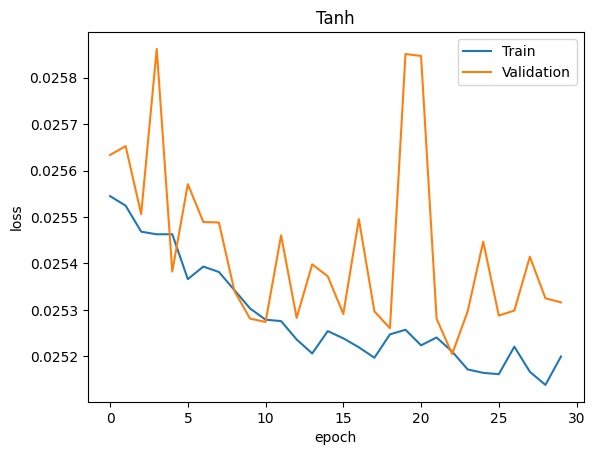

In [42]:
plt.plot(range(num_epochs), tanh_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Tanh")

plt.plot(range(num_epochs), tanh_val_losses)

plt.legend(["Train", "Validation"])

#What was the optimum number of epochs for training? why? as we see in the plots, 10 ephocs seems to be a good number for our purpose

#Repeat all the previous sections, but this time, add some convolutional layers to your model.

In [46]:
#Your code
class CNN_ReLU_model(nn.Module):

    def __init__(self):
        super(CNN_ReLU_model, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.relu3 = nn.ReLU()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(22 * 22 * 64, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu6 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu7 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)
        x = self.relu6(x)
        x = self.fc4(x)
        x = self.relu7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [47]:
#Your code
class CNN_Tanh_model(nn.Module):

    def __init__(self):
        super(CNN_Tanh_model, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.tanh1 = nn.Tanh()
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.tanh2 = nn.Tanh()
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.tanh3 = nn.Tanh()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(22 * 22 * 64, 512)
        self.tanh4 = nn.Tanh()
        self.fc2 = nn.Linear(512, 256)
        self.tanh5 = nn.Tanh()
        self.fc3 = nn.Linear(256, 128)
        self.tanh6 = nn.Tanh()
        self.fc4 = nn.Linear(128, 64)
        self.tanh7 = nn.Tanh()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.conv3(x)
        x = self.tanh3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh4(x)
        x = self.fc2(x)
        x = self.tanh5(x)
        x = self.fc3(x)
        x = self.tanh6(x)
        x = self.fc4(x)
        x = self.tanh7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_relu_model = CNN_ReLU_model().to(device)
cnn_tanh_model = CNN_Tanh_model().to(device)
criterion = nn.CrossEntropyLoss()
cnn_relu_optimizer = optim.Adam(cnn_relu_model.parameters(), lr = 0.001)
cnn_tanh_optimizer = optim.Adam(cnn_tanh_model.parameters(), lr = 0.001)

In [51]:
#Your code
num_epochs = 10

cnn_relu_train_losses = []
cnn_relu_train_accs = []

cnn_tanh_train_losses = []
cnn_tanh_train_accs = []


cnn_relu_val_losses = []
cnn_relu_val_accs = []

cnn_tanh_val_losses = []
cnn_tanh_val_accs = []


for epoch in range(num_epochs):

    cnn_relu_train_loss = 0
    cnn_relu_train_acc = 0

    cnn_tanh_train_loss = 0
    cnn_tanh_train_acc = 0
    
    for images, labels in tqdm(train_loader, desc = f"Epoch {epoch + 1}/{num_epochs}"):

        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_optimizer.zero_grad()
        cnn_tanh_optimizer.zero_grad()
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)

        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_loss.backward()
        cnn_tanh_loss.backward()
        
        cnn_relu_optimizer.step()
        cnn_tanh_optimizer.step()

        cnn_relu_train_loss += cnn_relu_loss
        cnn_tanh_train_loss += cnn_tanh_loss

        cnn_relu_train_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_train_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()

    cnn_relu_train_losses.append(cnn_relu_train_loss.item() / len(train_data))
    cnn_tanh_train_losses.append(cnn_tanh_train_loss.item() / len(train_data))

    cnn_relu_train_accs.append(cnn_relu_train_acc.item() / len(train_data) * 100)
    cnn_tanh_train_accs.append(cnn_tanh_train_acc.item() / len(train_data) * 100)        

    print("epoch =", epoch + 1)
    print("cnn_relu_train_loss =", cnn_relu_train_losses[-1], "cnn_relu_train_acc =", cnn_relu_train_accs[-1])
    print("cnn_tanh_train_loss =", cnn_tanh_train_losses[-1], "cnn_tanh_train_acc =", cnn_tanh_train_accs[-1])

    with torch.no_grad():

        cnn_relu_val_loss = 0
        cnn_tanh_val_loss = 0
        
        cnn_relu_val_acc = 0
        cnn_tanh_val_acc = 0

    
        for images, labels in validation_loader:
            
            images, labels = images.to(device), labels.to(device)
            
            cnn_relu_outputs = cnn_relu_model.forward(images)
            cnn_tanh_outputs = cnn_tanh_model.forward(images)
            
            cnn_relu_loss = criterion(cnn_relu_outputs, labels)
            cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
    
            
            cnn_relu_val_loss += cnn_relu_loss
            cnn_tanh_val_loss += cnn_tanh_loss
            
            cnn_relu_val_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
            cnn_tanh_val_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
            
        print("cnn_relu_val_loss =", cnn_relu_val_loss.item() / len(validation_data), "cnn_relu_val_acc =", cnn_relu_val_acc.item() / len(validation_data) * 100)
        print("cnn_tanh_val_loss =", cnn_tanh_val_loss.item() / len(validation_data), "cnn_tanh_val_acc =", cnn_tanh_val_acc.item() / len(validation_data) * 100)

        cnn_relu_val_losses.append(cnn_relu_val_loss.item() / len(validation_data))
        cnn_tanh_val_losses.append(cnn_tanh_val_loss.item() / len(validation_data))

        cnn_relu_val_accs.append(cnn_relu_val_acc.item() / len(validation_data) * 100)
        cnn_tanh_val_accs.append(cnn_tanh_val_acc.item() / len(validation_data) * 100)
    
#Your code

Epoch 1/10: 100%|██████████| 600/600 [07:40<00:00,  1.30it/s]


epoch = 1
cnn_relu_train_loss = 0.030487550099690754 cnn_relu_train_acc = 50.94531249999999
cnn_tanh_train_loss = 0.027212874094645182 cnn_tanh_train_acc = 72.3671875
cnn_relu_val_loss = 0.030913553237915038 cnn_relu_val_acc = 48.270833333333336
cnn_tanh_val_loss = 0.027045405705769857 cnn_tanh_val_acc = 73.15625


Epoch 2/10: 100%|██████████| 600/600 [05:30<00:00,  1.82it/s]


epoch = 2
cnn_relu_train_loss = 0.03629560788472493 cnn_relu_train_acc = 13.822916666666666
cnn_tanh_train_loss = 0.026943740844726564 cnn_tanh_train_acc = 73.7734375
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.026834967931111654 cnn_tanh_val_acc = 74.54166666666666


Epoch 3/10: 100%|██████████| 600/600 [04:59<00:00,  2.01it/s]


epoch = 3
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.02683082898457845 cnn_tanh_train_acc = 74.40104166666667
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.027072957356770833 cnn_tanh_val_acc = 72.89583333333334


Epoch 4/10: 100%|██████████| 600/600 [04:49<00:00,  2.07it/s]


epoch = 4
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.02669592539469401 cnn_tanh_train_acc = 75.34375
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.026472881635030112 cnn_tanh_val_acc = 76.70833333333333


Epoch 5/10: 100%|██████████| 600/600 [04:52<00:00,  2.05it/s]


epoch = 5
cnn_relu_train_loss = 0.03688846588134766 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.026519490877787273 cnn_tanh_train_acc = 76.39583333333333
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.026352607409159342 cnn_tanh_val_acc = 77.51041666666667


Epoch 6/10: 100%|██████████| 600/600 [04:57<00:00,  2.02it/s]


epoch = 6
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.026974627176920573 cnn_tanh_train_acc = 73.48958333333333
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.027113081614176433 cnn_tanh_val_acc = 72.46875


Epoch 7/10: 100%|██████████| 600/600 [04:59<00:00,  2.01it/s]


epoch = 7
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.026478125254313152 cnn_tanh_train_acc = 76.5703125
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.026591803232828778 cnn_tanh_val_acc = 75.82291666666666


Epoch 8/10: 100%|██████████| 600/600 [04:49<00:00,  2.07it/s]


epoch = 8
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.02655947208404541 cnn_tanh_train_acc = 76.09375
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.0267631467183431 cnn_tanh_val_acc = 74.77083333333333


Epoch 9/10: 100%|██████████| 600/600 [04:56<00:00,  2.02it/s]


epoch = 9
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.02646612485249837 cnn_tanh_train_acc = 76.6796875
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.026388338406880697 cnn_tanh_val_acc = 77.08333333333334


Epoch 10/10: 100%|██████████| 600/600 [04:49<00:00,  2.07it/s]


epoch = 10
cnn_relu_train_loss = 0.036888469060262045 cnn_relu_train_acc = 10.028645833333332
cnn_tanh_train_loss = 0.02630409081776937 cnn_tanh_train_acc = 77.76041666666667
cnn_relu_val_loss = 0.03689298311869303 cnn_relu_val_acc = 10.0
cnn_tanh_val_loss = 0.0264003324508667 cnn_tanh_val_acc = 77.10416666666666


In [52]:
cnn_relu_test_loss = 0
cnn_tanh_test_loss = 0

cnn_relu_test_acc = 0
cnn_tanh_test_acc = 0

with torch.no_grad():
    
    for images, labels in test_loader:
        
        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)
        
        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_test_loss += cnn_relu_loss
        cnn_tanh_test_loss += cnn_tanh_loss
        
        cnn_relu_test_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_test_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
        
    print("cnn_relu_test_loss =", cnn_relu_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_relu_test_acc.item() / len(test_data) * 100)
    print("cnn_tanh_test_loss =", cnn_tanh_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_tanh_test_acc.item() / len(test_data) * 100)


cnn_relu_test_loss = 0.037072882080078126 cnn_test_acc = 10.0
cnn_tanh_test_loss = 0.02655251159667969 cnn_test_acc = 76.84


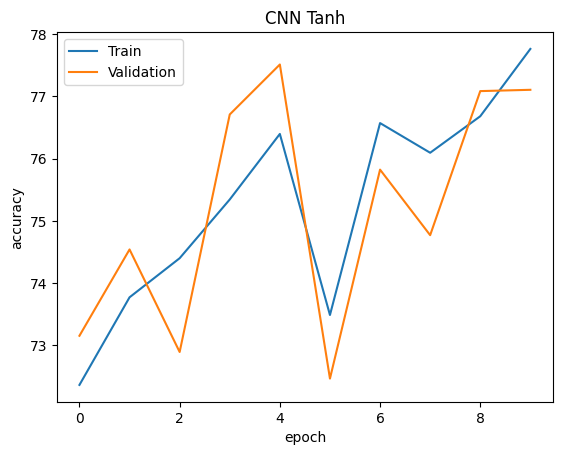

In [53]:
plt.plot(range(num_epochs), cnn_tanh_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN Tanh")

plt.plot(range(num_epochs), cnn_tanh_val_accs)

plt.legend(["Train", "Validation"])

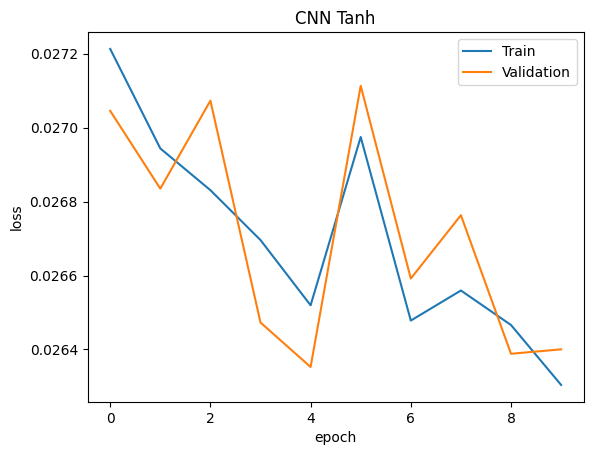

In [54]:
plt.plot(range(num_epochs), cnn_tanh_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN Tanh")

plt.plot(range(num_epochs), cnn_tanh_val_losses)

plt.legend(["Train", "Validation"])

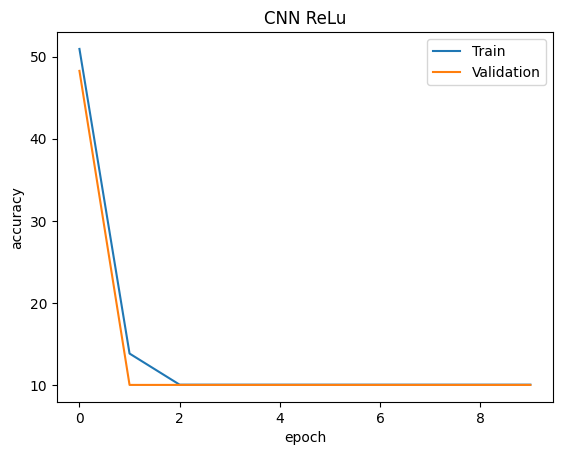

In [55]:
plt.plot(range(num_epochs), cnn_relu_train_accs)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN ReLu")

plt.plot(range(num_epochs), cnn_relu_val_accs)

plt.legend(["Train", "Validation"])

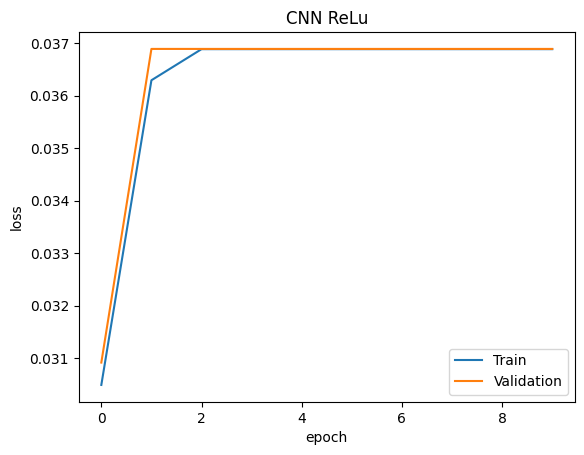

In [56]:
plt.plot(range(num_epochs), cnn_relu_train_losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN ReLu")

plt.plot(range(num_epochs), cnn_relu_val_losses)

plt.legend(["Train", "Validation"])

# How can we get to highr accuracy?

# First, define the max pooling and dropout techniques, and then use them in your model to enhance the accuracy.

#Report the accuracies and plot the mentioned figures.

In [57]:
#Your code
class CNNReLUModel(nn.Module):

    def __init__(self):
        super(CNNReLUModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout1 = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout2 = nn.Dropout(0.2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(19 * 19 * 64, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu6 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu7 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = self.dropout2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)
        x = self.relu6(x)
        x = self.fc4(x)
        x = self.relu7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [58]:
#Your code
class CNNTanhModel(nn.Module):

    def __init__(self):
        super(CNNTanhModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 3)
        self.tanh1 = nn.Tanh()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3)
        self.tanh2 = nn.Tanh()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout1 = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)
        self.tanh3 = nn.Tanh()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.dropout2 = nn.Dropout(0.2)

        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(19 * 19 * 64, 512)
        self.tanh4 = nn.Tanh()
        self.fc2 = nn.Linear(512, 256)
        self.tanh5 = nn.Tanh()
        self.fc3 = nn.Linear(256, 128)
        self.tanh6 = nn.Tanh()
        self.fc4 = nn.Linear(128, 64)
        self.tanh7 = nn.Tanh()
        self.fc5 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.maxpool2(x)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = self.tanh3(x)
        x = self.maxpool3(x)
        x = self.dropout2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh4(x)
        x = self.fc2(x)
        x = self.tanh5(x)
        x = self.fc3(x)
        x = self.tanh6(x)
        x = self.fc4(x)
        x = self.tanh7(x)
        x = self.fc5(x)
        x = self.softmax(x)

        return x
        
#Your code

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_relu_model = CNNReLUModel().to(device)
cnn_tanh_model = CNNTanhModel().to(device)
cnn_relu_optimizer = optim.Adam(cnn_relu_model.parameters(), lr = 0.001)
cnn_tanh_optimizer = optim.Adam(cnn_tanh_model.parameters(), lr = 0.001)

In [61]:
#Your code
num_epochs = 30

cnn_relu_train_losses = []
cnn_tanh_train_losses = []

cnn_relu_train_accs = []
cnn_tanh_train_accs = []


cnn_relu_val_losses = []
cnn_tanh_val_losses = []

cnn_relu_val_accs = []
cnn_tanh_val_accs = []


for epoch in range(num_epochs):

    cnn_relu_train_loss = 0
    cnn_relu_train_acc = 0

    cnn_tanh_train_loss = 0
    cnn_tanh_train_acc = 0
    
    for images, labels in tqdm(train_loader, desc = f"Epoch {epoch + 1}/{num_epochs}"):

        cnn_relu_model.train(True)
        cnn_tanh_model.train(True)

        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_optimizer.zero_grad()
        cnn_tanh_optimizer.zero_grad()
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)

        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_loss.backward()
        cnn_tanh_loss.backward()
        
        cnn_relu_optimizer.step()
        cnn_tanh_optimizer.step()

        cnn_relu_train_loss += cnn_relu_loss
        cnn_tanh_train_loss += cnn_tanh_loss

        cnn_relu_train_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_train_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()

    cnn_relu_train_losses.append(cnn_relu_train_loss.item() / len(train_data))
    cnn_tanh_train_losses.append(cnn_tanh_train_loss.item() / len(train_data))

    cnn_relu_train_accs.append(cnn_relu_train_acc.item() / len(train_data) * 100)
    cnn_tanh_train_accs.append(cnn_tanh_train_acc.item() / len(train_data) * 100)        

    print("epoch =", epoch + 1)
    print("cnn_relu_train_loss =", cnn_relu_train_losses[-1], "cnn_relu_train_acc =", cnn_relu_train_accs[-1])
    print("cnn_tanh_train_loss =", cnn_tanh_train_losses[-1], "cnn_tanh_train_acc =", cnn_tanh_train_accs[-1])

    with torch.no_grad():

        cnn_relu_val_loss = 0
        cnn_tanh_val_loss = 0
        
        cnn_relu_val_acc = 0
        cnn_tanh_val_acc = 0
    
        for images, labels in validation_loader:

            cnn_relu_model.train(False)
            cnn_tanh_model.train(False)
            
            images, labels = images.to(device), labels.to(device)
            
            cnn_relu_outputs = cnn_relu_model.forward(images)
            cnn_tanh_outputs = cnn_tanh_model.forward(images)
            
            cnn_relu_loss = criterion(cnn_relu_outputs, labels)
            cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
    
            
            cnn_relu_val_loss += cnn_relu_loss
            cnn_tanh_val_loss += cnn_tanh_loss
            
            cnn_relu_val_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
            cnn_tanh_val_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
            
        print("cnn_relu_val_loss =", cnn_relu_val_loss.item() / len(validation_data), "cnn_relu_val_acc =", cnn_relu_val_acc.item() / len(validation_data) * 100)
        print("cnn_tanh_val_loss =", cnn_tanh_val_loss.item() / len(validation_data), "cnn_tanh_val_acc =", cnn_tanh_val_acc.item() / len(validation_data) * 100)

        cnn_relu_val_losses.append(cnn_relu_val_loss.item() / len(validation_data))
        cnn_tanh_val_losses.append(cnn_tanh_val_loss.item() / len(validation_data))

        cnn_relu_val_accs.append(cnn_relu_val_acc.item() / len(validation_data) * 100)
        cnn_tanh_val_accs.append(cnn_tanh_val_acc.item() / len(validation_data) * 100)
    
#Your code

Epoch 1/30: 100%|██████████| 600/600 [06:55<00:00,  1.44it/s]


epoch = 1
cnn_relu_train_loss = 0.03306196530659993 cnn_relu_train_acc = 34.432291666666664
cnn_tanh_train_loss = 0.027604347864786785 cnn_tanh_train_acc = 70.984375
cnn_relu_val_loss = 0.036213347117106116 cnn_relu_val_acc = 14.354166666666668
cnn_tanh_val_loss = 0.026905059814453125 cnn_tanh_val_acc = 73.88541666666667


Epoch 2/30:  49%|████▉     | 295/600 [03:04<03:10,  1.60it/s]


KeyboardInterrupt: 

In [63]:
cnn_relu_test_loss = 0
cnn_tanh_test_loss = 0

cnn_relu_test_acc = 0
cnn_tanh_test_acc = 0

with torch.no_grad():
    
    for images, labels in test_loader:

        cnn_relu_model.train(False)
        cnn_tanh_model.train(False)
        
        images, labels = images.to(device), labels.to(device)
        
        cnn_relu_outputs = cnn_relu_model.forward(images)
        cnn_tanh_outputs = cnn_tanh_model.forward(images)
        
        cnn_relu_loss = criterion(cnn_relu_outputs, labels)
        cnn_tanh_loss = criterion(cnn_tanh_outputs, labels)
        
        cnn_relu_test_loss += cnn_relu_loss
        cnn_tanh_test_loss += cnn_tanh_loss
        
        cnn_relu_test_acc += (torch.argmax(cnn_relu_outputs, dim = 1) == labels).sum()
        cnn_tanh_test_acc += (torch.argmax(cnn_tanh_outputs, dim = 1) == labels).sum()
        
    print("cnn_relu_test_loss =", cnn_relu_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_relu_test_acc.item() / len(test_data) * 100)
    print("cnn_tanh_test_loss =", cnn_tanh_test_loss.item() / len(test_data), "cnn_test_acc =", cnn_tanh_test_acc.item() / len(test_data) * 100)


cnn_relu_test_loss = 0.037063473510742184 cnn_test_acc = 10.0
cnn_tanh_test_loss = 0.027018936157226562 cnn_test_acc = 74.15
